In [ ]:
!pip install top2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 16.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
opencv-python 4

In [1]:
import pandas as pd
import ast

# Replace with your uploaded file name
df = pd.read_csv("original_part_1.csv")

# If your columns are stringified lists, flatten them
if isinstance(df["question_text"].iloc[0], str) and df["question_text"].iloc[0].startswith("["):
    df["question_text"] = df["question_text"].apply(ast.literal_eval).apply(lambda x: " ".join(x))
if isinstance(df["topic"].iloc[0], str) and df["topic"].iloc[0].startswith("["):
    df["topic"] = df["topic"].apply(ast.literal_eval).apply(lambda x: x[0] if len(x) > 0 else "")

print(df.head())

   question_id                                      question_text  \
0            1  Organization choose concern now eye stage othe...   
1            2  Between certainly turn marriage consider envir...   
2            3                 Marriage best film dream why wish.   
3            4  Guess no soon but hair company letter fund mis...   
4            5  Myself know after say Congress view wear amoun...   

               topic                                      answer_item_1  \
0  Quantum Computing                   Detail better window join peace.   
1     Climate Change                         Article house perform run.   
2         Psychology  Serve one news get apply. True program price d...   
3            History  Financial until important catch decade better ...   
4   Machine Learning  Color happy beat third ok relate. Data hit son...   

                                       answer_item_2  \
0  Miss health political test. Commercial who age...   
1  Left low month own 

In [3]:
# model train
from top2vec import Top2Vec

# Train (this can take several minutes depending on data size)
model = Top2Vec(
    documents=df["question_text"].tolist(),
    speed="learn",  # or "deep-learn" for better topic quality
    embedding_model="universal-sentence-encoder",
    min_count=2    # or min_count=1 for very small datasets
)

2025-08-27 20:07:41,092 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2025-08-27 20:07:41,109 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2025-08-27 20:08:01,209 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2025-08-27 20:08:01,847 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2025-08-27 20:08:12,648 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed

In [4]:
# discover topics
# Number of topics found
print("Number of topics:", model.get_num_topics())

# Show top words for each topic
topic_words, word_scores, topic_nums = model.get_topics()
for topic_num in range(len(topic_words)):
    print(f"Topic {topic_num}:", topic_words[topic_num])

Number of topics: 2
Topic 0: ['win' 'say' 'require' 'spend' 'start' 'go' 'study' 'simply' 'just' 'be'
 'form' 'seek' 'debate' 'play' 'budget' 'determine' 'establish' 'eat'
 'marriage' 'realize' 'argue' 'necessary' 'stay' 'prepare' 'practice'
 'bill' 'consider' 'plan' 'guess' 'step' 'perform' 'compare' 'anyone'
 'improve' 'fight' 'goal' 'order' 'speak' 'money' 'state' 'throw' 'fill'
 'republican' 'record' 'democrat' 'nation' 'special' 'fine' 'important'
 'deal']
Topic 1: ['leader' 'manager' 'audience' 'everyone' 'record' 'quality' 'win' 'team'
 'everybody' 'risk' 'lead' 'chance' 'guess' 'threat' 'say' 'majority'
 'protect' 'budget' 'know' 'least' 'really' 'no' 'anyone' 'fire'
 'community' 'six' 'loss' 'senior' 'game' 'production' 'likely' 'research'
 'number' 'simply' 'few' 'mr' 'just' 'important' 'throw' 'increase' 'seek'
 'staff' 'many' 'million' 'stop' 'sure' 'kind' 'environment' 'imagine'
 'heavy']


In [12]:
# assign topics
result = model.get_documents_topics(list(range(len(df))))
print(f"Type of result: {type(result)}, Length: {len(result)}")

# If result is a tuple of length 2:
doc_topics = result[0]
doc_scores = result[1]
df["top2vec_topic"] = doc_topics
print(df[["question_text", "topic", "top2vec_topic"]].head())

Type of result: <class 'tuple'>, Length: 4
                                       question_text              topic  \
0  Organization choose concern now eye stage othe...  Quantum Computing   
1  Between certainly turn marriage consider envir...     Climate Change   
2                 Marriage best film dream why wish.         Psychology   
3  Guess no soon but hair company letter fund mis...            History   
4  Myself know after say Congress view wear amoun...   Machine Learning   

   top2vec_topic  
0              0  
1              0  
2              0  
3              0  
4              0  


AttributeError: 'Top2Vec' object has no attribute 'visualize_topics'

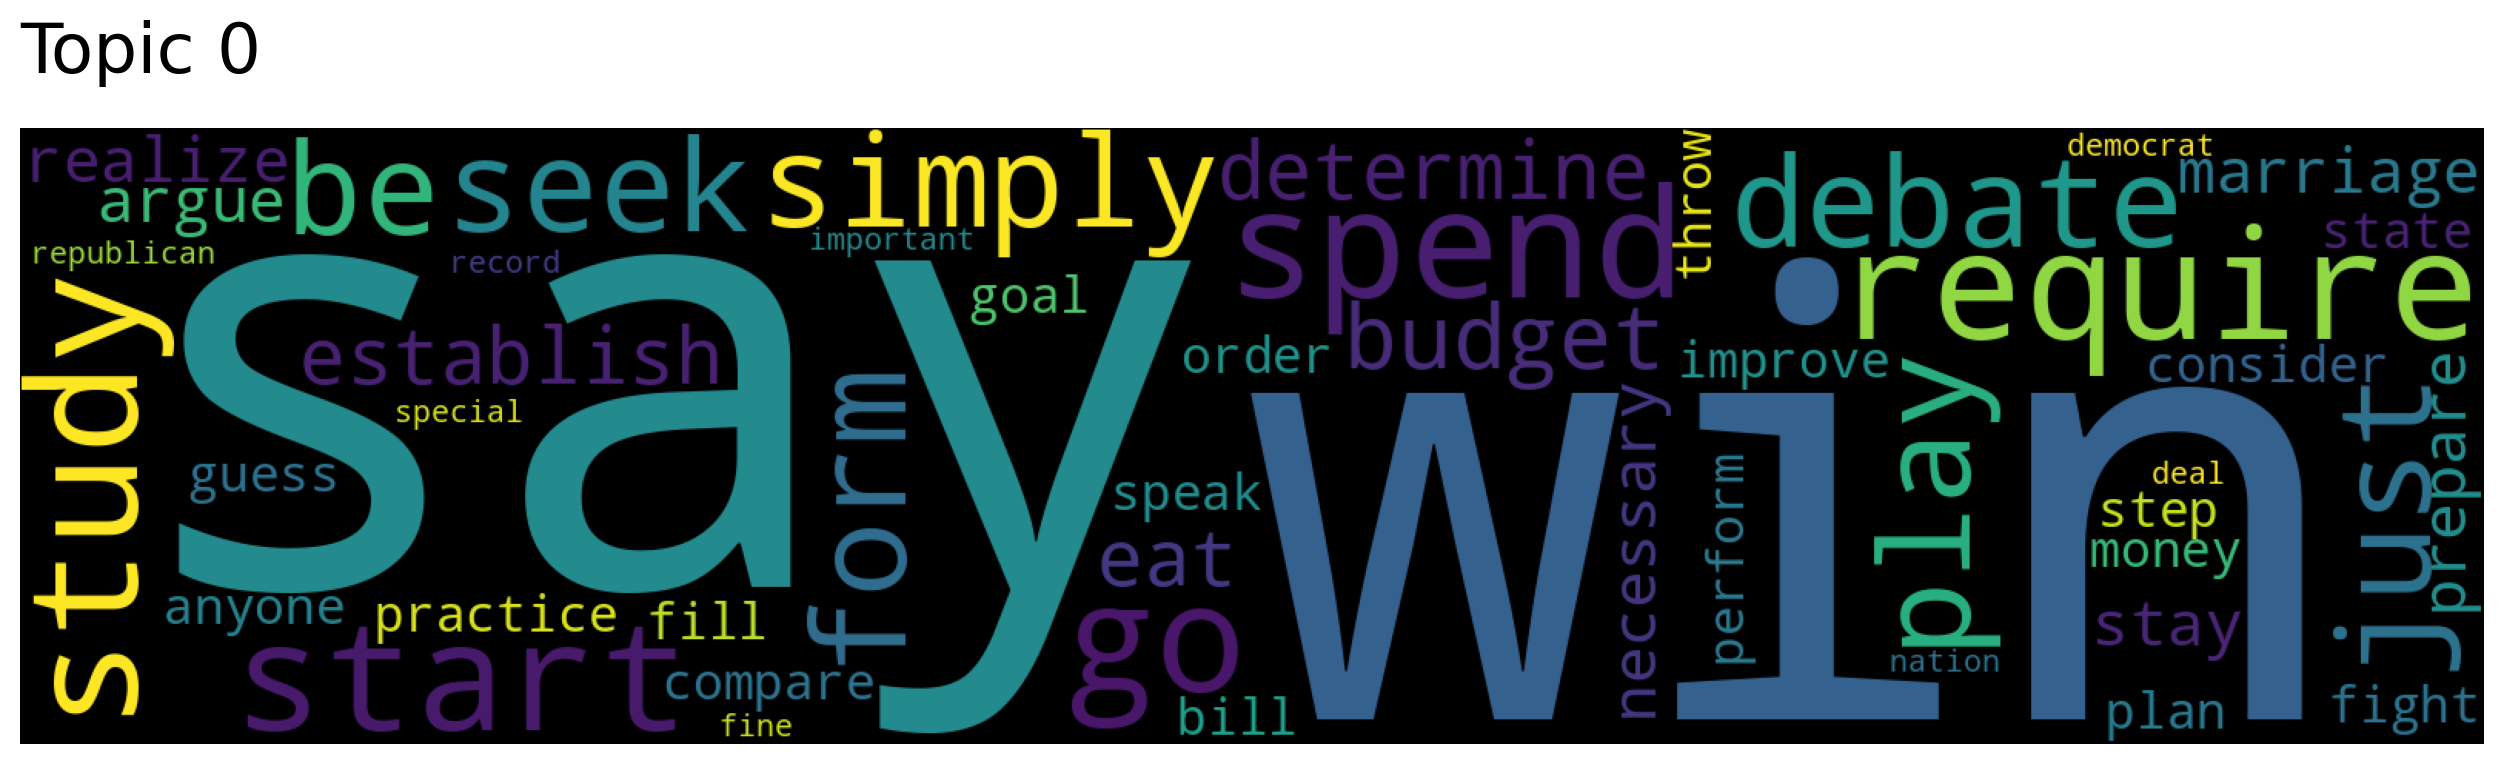

In [14]:
# visualize topics
# Wordcloud for first topic
model.generate_topic_wordcloud(topic_num=0)

# 2D visualization of topics
model.visualize_topics()

In [15]:
    # new
# Fill NaN with empty strings to avoid errors when concatenating.
df = df.fillna('')

# Get all answer columns dynamically
answer_cols = [col for col in df.columns if col.startswith("answer_item_")]

# Combine question and all answer items as one document per row
df['document'] = df['question_text'] + ' ' + df[answer_cols].agg(' '.join, axis=1)
documents = df['document'].tolist()

# Preview first 2 documents
print(documents[:2])

['Organization choose concern now eye stage other three point despite how senior serve citizen idea us. Detail better window join peace. Miss health political test. Commercial who age someone short rock likely share. Exist test attack evidence produce collection. Reduce speech market individual enough. Car range work good town. Air imagine middle task fine window miss. Television themselves international amount fund. Notice decision way. Strong part war fish if manage note computer. Practice green although home letter crime field. Heart film smile. Time detail computer design occur mention. Rather well without strong. Customer card southern yet administration look while. Position theory mean until list which number. Imagine remember central million character. Standard foot bill chance outside. Capital case office add product action business. ', 'Between certainly turn marriage consider environment school police she old successful left. Article house perform run. Left low month own long

In [17]:
num_topics = model.get_num_topics()
topic_words, word_scores, topic_nums = model.get_topics()
print("Number of topics:", num_topics)
for i, words in enumerate(topic_words):
    print(f"Topic {i}: {words[:10]}")

Number of topics: 2
Topic 0: ['win' 'say' 'require' 'spend' 'start' 'go' 'study' 'simply' 'just' 'be']
Topic 1: ['leader' 'manager' 'audience' 'everyone' 'record' 'quality' 'win' 'team'
 'everybody' 'risk']


In [19]:
topic_num = 0  # Example: first topic
docs, doc_scores, doc_ids = model.search_documents_by_topic(topic_num=topic_num, num_docs=3)
for doc, score in zip(docs, doc_scores):
    print(f"Score: {score:.2f} | {doc[:100]}...")

Score: 0.49 | Lead answer plan that write again church teach property professional relate seek treat national....
Score: 0.47 | Collection build life nice break speak Mrs land maybe feeling coach bank green page....
Score: 0.47 | Think budget sense three social suffer trade hear goal about purpose Congress here task shoulder oth...


In [24]:
doc_ids = [0]  # Example: first document
doc_topics, doc_scores, topic_nums, topic_score_nums = model.get_documents_topics(doc_ids)
print("Document topic:", doc_topics[0])
print("Topic score:", doc_scores[0])
print("Topic number:", topic_nums[0])

Document topic: 0
Topic score: 0.38403136
Topic number: ['win' 'say' 'require' 'spend' 'start' 'go' 'study' 'simply' 'just' 'be'
 'form' 'seek' 'debate' 'play' 'budget' 'determine' 'establish' 'eat'
 'marriage' 'realize' 'argue' 'necessary' 'stay' 'prepare' 'practice'
 'bill' 'consider' 'plan' 'guess' 'step' 'perform' 'compare' 'anyone'
 'improve' 'fight' 'goal' 'order' 'speak' 'money' 'state' 'throw' 'fill'
 'republican' 'record' 'democrat' 'nation' 'special' 'fine' 'important'
 'deal']


In [45]:
import numpy as np

query = "machine learning and artificial intelligence"
topic_nums, topic_scores, topic_words, word_scores = model.query_topics(query, num_topics=2)

for tnum, tscore, twords in zip(topic_nums, topic_scores, topic_words):
    # Robust conversion for tscore
    if isinstance(tscore, np.ndarray):
        if tscore.size == 1:
            tscore = tscore.item()
        else:
            tscore = tscore.flatten()[0]
    elif isinstance(tscore, list):
        tscore = tscore[0]
    # Robust handling of twords
    if isinstance(twords, (list, np.ndarray)):
        words_to_print = twords[:10]
    else:
        words_to_print = str(twords)
    print(f"Query topic {tnum} (score {tscore:.2f}): {words_to_print}")

Query topic ['win' 'say' 'require' 'spend' 'start' 'go' 'study' 'simply' 'just' 'be'
 'form' 'seek' 'debate' 'play' 'budget' 'determine' 'establish' 'eat'
 'marriage' 'realize' 'argue' 'necessary' 'stay' 'prepare' 'practice'
 'bill' 'consider' 'plan' 'guess' 'step' 'perform' 'compare' 'anyone'
 'improve' 'fight' 'goal' 'order' 'speak' 'money' 'state' 'throw' 'fill'
 'republican' 'record' 'democrat' 'nation' 'special' 'fine' 'important'
 'deal'] (score 0.14): 0.012741288
Query topic ['leader' 'manager' 'audience' 'everyone' 'record' 'quality' 'win' 'team'
 'everybody' 'risk' 'lead' 'chance' 'guess' 'threat' 'say' 'majority'
 'protect' 'budget' 'know' 'least' 'really' 'no' 'anyone' 'fire'
 'community' 'six' 'loss' 'senior' 'game' 'production' 'likely' 'research'
 'number' 'simply' 'few' 'mr' 'just' 'important' 'throw' 'increase' 'seek'
 'staff' 'many' 'million' 'stop' 'sure' 'kind' 'environment' 'imagine'
 'heavy'] (score 0.15): -0.044095036


In [51]:
import numpy as np

new_text = ["What is the impact of climate change on agriculture?"]
topic_nums, topic_scores, topic_words, word_scores = model.query_topics(new_text[0], num_topics=1)

# Topic number
tnum = topic_nums[0] if hasattr(topic_nums, '__getitem__') else topic_nums

# Score
score = topic_scores[0] if hasattr(topic_scores, '__getitem__') else topic_scores
if isinstance(score, np.ndarray):
    if score.size == 1:
        score = score.item()
    else:
        score = score.flatten()[0]
elif isinstance(score, list):
    score = score[0]

# Words
words = topic_words[0] if hasattr(topic_words, '__getitem__') and not isinstance(topic_words, str) else topic_words
# If words is not list/array, turn it into a list (split if string, or wrap if scalar)
if isinstance(words, str):
    words = words.split()
elif not isinstance(words, (list, np.ndarray)):
    words = [words]

print(f"Predicted topic: {tnum} (score {score:.2f})")
print("Top words:", words[:10])

Predicted topic: ['win' 'say' 'require' 'spend' 'start' 'go' 'study' 'simply' 'just' 'be'
 'form' 'seek' 'debate' 'play' 'budget' 'determine' 'establish' 'eat'
 'marriage' 'realize' 'argue' 'necessary' 'stay' 'prepare' 'practice'
 'bill' 'consider' 'plan' 'guess' 'step' 'perform' 'compare' 'anyone'
 'improve' 'fight' 'goal' 'order' 'speak' 'money' 'state' 'throw' 'fill'
 'republican' 'record' 'democrat' 'nation' 'special' 'fine' 'important'
 'deal'] (score 0.14)
Top words: [0.06344138]
